In [1]:
import pandas as pd
import numpy as np
import nltk
import future
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Data Labeling
In this step we clean the data and label the data as
0 for Poor
1 for Neutral
2 for Good


Read the data from 'Amazon_Unlocked_Mobile.csv' and add new column for labels

In [2]:
def label_data():
    rows = pd.read_csv("C:/Users\CHIRAG\Desktop\Python\Industry mentor\Amazon_Unlocked_Mobile.csv", header=0, index_col=False, delimiter=',')
    labels = []
    for cell in rows['Rating']:
        if cell >= 4:
            labels.append('2')   #Good
        elif cell == 3:
            labels.append('1')   #Neutral
        else:
            labels.append('0')   #Poor
            
    rows['Label'] = labels
    del rows['Review Votes']
    return rows

# Data Cleaning
Remove all the rows containing blank cells. The resultant data is stored as 'labelled_dataset.csv'

In [3]:
def clean_data(data):
    #columnwise print number of rows containing blank values
    #print data.isnull().sum()
    
    #replace blank values in all the cells with 'nan'
    data.replace('',np.nan,inplace=True)
    #delete all the rows which contain at least one cell with nan value
    data.dropna(axis=0, how='any', inplace=True)
    
    #Check the number of rows containing blank values. This should be zero now as compared to first line of this function
    #print data.isnull().sum()
    #save output csv file
    data.to_csv('labelled_dataset.csv', index=False)
    return data

# Data preprocessing
The following text preprocessing are implemented to convert raw reviews to cleaned review, so that it will be easier for us to do feature extraction in the next step.


remove html tags using BeautifulSoup

remove non-character such as digits and symbols

convert to lower case

remove stop words such as "the" and "and" if needed

convert to root words by stemming if needed

In [4]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [5]:
def modelEvaluation(predictions, y_test_set):
    #Print model evaluation to predicted result 
    
    print ("\n Accuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    print ("\nAUC score : {:.4f}".format(roc_auc_score(y_test_set, predictions)))
    print ("\n Classification report : \n", metrics.classification_report(y_test_set, predictions))
    print ("\n Confusion Matrix : \n", metrics.confusion_matrix(y_test_set, predictions))


# Bag of Words
The sentiment analysis of given text can be done in two ways. First, we need to find a word embedding to convert a text into a numerical representation. Second, we fit the numerical representations of text to machine learning algorithms or deep learning architectures.

One common approach of word embedding is frequency based embedding such as Bag of Words (BoW) model. BoW model learns a vocubulary list from a given corpus and represents each document based on some counting methods of words. In this part, we will explore the model performance of using BoW with supervised learning algorithms. Here's the workflow in this part.

Step 1 : Preprocess raw reviews to cleaned reviews

Step 2 : Create BoW using CountVectorizer / Tfidfvectorizer in sklearn

Step 3 : Transform review text to numerical representations (feature vectors)

Step 4 : Fit feature vectors to supervised learning algorithm (eg. Naive Bayes, Logistic regression, etc.)

Step 5 : Improve the model performance by GridSearch

# Visualisation

In [6]:
if __name__ == '__main__':
    data = label_data()
    data = clean_data(data)
    #prints first 5 rows of the dataset
    print(data.head())

                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews Label  
0       5  I feel so LUCKY to have found this used (phone...     2  
1       4  nice phone, nice up grade from my pantach revu...     2  
2       5                                       Very pleased     2  
3       4  It works good but it goes slow sometimes but i...     2  
4       4  Great phone to replace my lost phone. The only...     2  


Text(0, 0.5, 'Count')

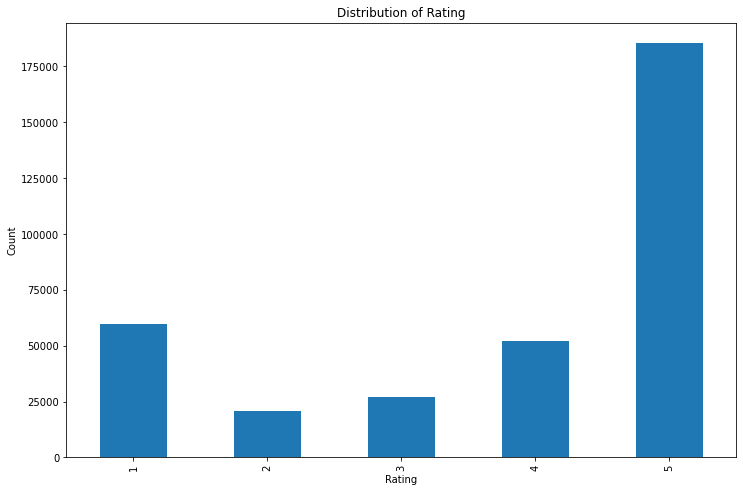

In [7]:
    # Plot distribution of rating
    plt.figure(figsize=(12,8))
    # sns.countplot(data['Rating'])
    data['Rating'].value_counts().sort_index().plot(kind='bar')
    plt.title('Distribution of Rating')
    plt.xlabel('Rating')
    plt.ylabel('Count')

Text(0.5, 1.0, 'Number of Reviews for Top 20 Brands')

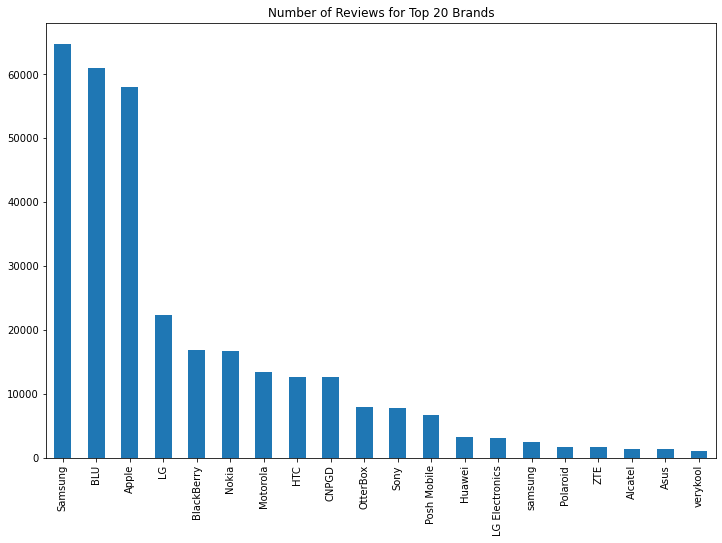

In [8]:
    # Plot number of reviews for top 20 brands
    brands = data["Brand Name"].value_counts()
    # brands.count()
    plt.figure(figsize=(12,8))
    brands[:20].plot(kind='bar')
    plt.title("Number of Reviews for Top 20 Brands")


Text(0.5, 1.0, 'Number of Reviews for Top 50 Products')

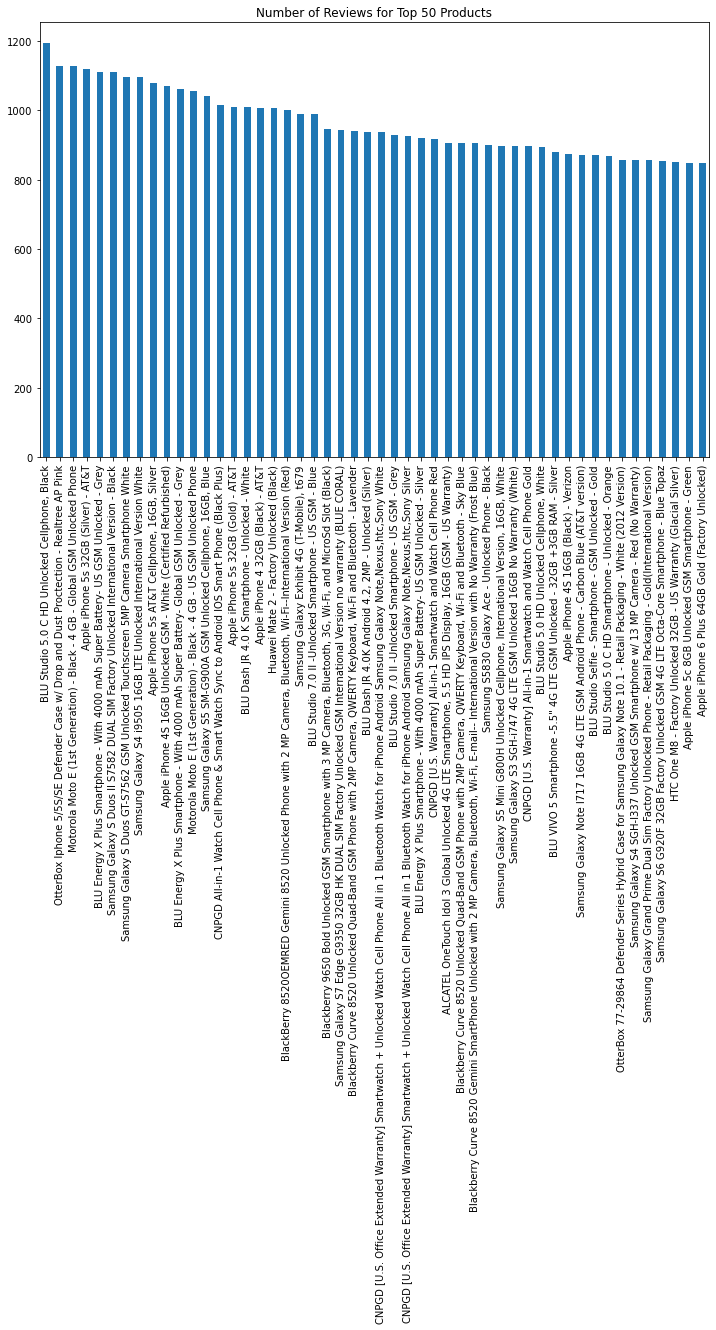

In [9]:
    # Plot number of reviews for top 50 products
    products = data["Product Name"].value_counts()
    plt.figure(figsize=(12,8))
    products[:50].plot(kind='bar')
    plt.title("Number of Reviews for Top 50 Products")

Text(0, 0.5, 'Count')

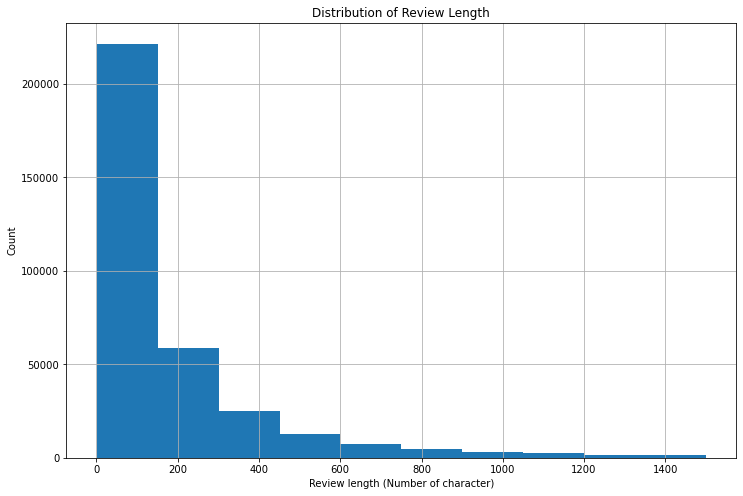

In [10]:
    # Plot distribution of review length
    review_length = data["Reviews"].dropna().map(lambda x: len(x))
    plt.figure(figsize=(12,8))
    review_length.loc[review_length < 1500].hist()
    plt.title("Distribution of Review Length")
    plt.xlabel('Review length (Number of character)')
    plt.ylabel('Count')

# Model


In [11]:
    #split data into training and testing set
    x_train, x_test, y_train, y_test = train_test_split(data['Reviews'], data['Label'], test_size=0.1, random_state=0)
    
    
    #If the label are words instead of numbers, they can be replaced programmatically using following two lines
    #y_train = label_binarize(y_train, classes=[0, 1, 2])
    #y_test = label_binarize(y_test, classes=[0, 1, 2])

In [12]:
    # Preprocess text data in training set and validation set
    x_train_cleaned = []
    x_test_cleaned = []

    for d in x_train:
        x_train_cleaned.append(cleanText(d))

    for d in x_test:
        x_test_cleaned.append(cleanText(d))   

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://www.amazon.com/gp/product/B00OSTKZWM?redirect=true&ref_=cm_cr_ryp_prd_ttl_sol_1" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://www.amazon.com/gp/product/B013YDFH3Y?redirect=true&ref_=cm_cr_ryp_prd_ttl_sol_0" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "https://www.amazon.com/gp/product/B00U8KSNB0/ref=cm_cr_ryp_prd_ttl_sol_22" looks like a URL. Beautiful Soup is not an HTTP clien

In [13]:
    # Fit and transform the training data to a document-term matrix using CountVectorizer
    countVect = CountVectorizer() 
    x_train_countVect = countVect.fit_transform(x_train_cleaned)
    print ("Number of features : %d \n" %len(countVect.get_feature_names())) #6378 
    print ("Show some feature names : \n", countVect.get_feature_names()[::1000])

Number of features : 54166 

Show some feature names : 
 ['aa', 'aerial', 'andcamera', 'ascetics', 'baggies', 'birdwatching', 'broadcasters', 'cannoy', 'cherished', 'commend', 'consumo', 'crunched', 'deficient', 'diffcult', 'dong', 'electing', 'esper', 'expirience', 'finecamera', 'friendlier', 'girls', 'guessedit', 'hhi', 'ilemming', 'instagraming', 'iwhatever', 'lablel', 'literallyhave', 'maneuverable', 'microsost', 'movillnet', 'nicelooking', 'office', 'outreach', 'percentbecause', 'pla', 'prepain', 'providing', 'raving', 'regale', 'restoration', 'salgan', 'semipro', 'simscroll', 'solidarity', 'starr', 'superglue', 'telefonical', 'tidy', 'tricks', 'uninstallation', 'vampire', 'wapencmms', 'withxxex', 'yupp']


In [17]:
    # Train MultinomialNB classifier
    mnb = MultinomialNB()
    mnb.fit(x_train_countVect, y_train)

MultinomialNB()

In [18]:
    # Evaluate the model on validaton set
    predictions = mnb.predict(countVect.transform(x_test_cleaned))
    modelEvaluation(predictions, y_test)


 Accuracy on validation set: 0.8552


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


ValueError: multi_class must be in ('ovo', 'ovr')